In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [29]:
aqi_2015_df = pd.read_csv("Resources/aqi_2015.csv")
aqi_2016_df = pd.read_csv("Resources/aqi_2016.csv")
aqi_2017_df = pd.read_csv("Resources/aqi_2017.csv")
aqi_2018_df = pd.read_csv("Resources/aqi_2018.csv")
aqi_2019_df = pd.read_csv("Resources/aqi_2019.csv")
aqi_2020_df = pd.read_csv("Resources/aqi_2020.csv")

In [30]:
aqi_2015_df.head()

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
0,Alabama,Baldwin,2015,264,230,33,1,0,0,0,129,53,38,0,0,189,0,75,0
1,Alabama,Clay,2015,112,101,11,0,0,0,0,91,50,32,0,0,0,0,112,0
2,Alabama,Colbert,2015,280,251,29,0,0,0,0,73,51,36,0,0,195,0,85,0
3,Alabama,DeKalb,2015,363,319,43,1,0,0,0,101,52,37,0,0,307,0,56,0
4,Alabama,Elmore,2015,233,223,9,1,0,0,0,115,47,35,0,0,233,0,0,0


In [31]:
# Eric - getting the median AQI, by state, for each year

In [32]:
median_aqi_2015 = aqi_2015_df.groupby("State")["Median AQI"].median()
median_aqi_2015_df = pd.DataFrame(median_aqi_2015)

In [33]:
median_aqi_2016 = aqi_2016_df.groupby("State")["Median AQI"].median()
median_aqi_2016_df = pd.DataFrame(median_aqi_2016)

In [34]:
median_aqi_2017 = aqi_2017_df.groupby("State")["Median AQI"].median()
median_aqi_2017_df = pd.DataFrame(median_aqi_2017)

In [35]:
median_aqi_2018 = aqi_2018_df.groupby("State")["Median AQI"].median()
median_aqi_2018_df = pd.DataFrame(median_aqi_2018)

In [36]:
median_aqi_2019 = aqi_2019_df.groupby("State")["Median AQI"].median()
median_aqi_2019_df = pd.DataFrame(median_aqi_2019)

In [37]:
median_aqi_2020 = aqi_2020_df.groupby("State")["Median AQI"].median()
median_aqi_2020_df = pd.DataFrame(median_aqi_2020)

In [38]:
# Merging each median AQI for each year into a single DataFrame
median_aqi_by_year_df = pd.merge(median_aqi_2015_df, median_aqi_2016_df, how='left', on='State')
median_aqi_by_year_df = median_aqi_by_year_df.rename(columns={"Median AQI_x": "2015", "Median AQI_y": "2016"})

In [39]:
median_aqi_by_year_df = pd.merge(median_aqi_by_year_df, median_aqi_2017_df, how='left', on='State')
median_aqi_by_year_df = median_aqi_by_year_df.rename(columns={"Median AQI": "2017"})

In [40]:
median_aqi_by_year_df = pd.merge(median_aqi_by_year_df, median_aqi_2018_df, how='left', on='State')
median_aqi_by_year_df = median_aqi_by_year_df.rename(columns={"Median AQI": "2018"})

In [41]:
median_aqi_by_year_df = pd.merge(median_aqi_by_year_df, median_aqi_2019_df, how='left', on='State')
median_aqi_by_year_df = median_aqi_by_year_df.rename(columns={"Median AQI": "2019"})

In [42]:
median_aqi_by_year_df = pd.merge(median_aqi_by_year_df, median_aqi_2020_df, how='left', on='State')
median_aqi_by_year_df = median_aqi_by_year_df.rename(columns={"Median AQI": "2020"})

In [75]:
# median AQI for each state by each year
median_aqi_by_year_df.head()

,2015,2016,2017,2018,2019,2020
State,,,,,,
Alabama,38.5,40.0,37.0,35.0,39.0,35.0
Alaska,24.5,31.0,22.0,23.5,19.0,13.0
Arizona,43.0,44.0,45.0,44.0,45.0,45.0
Arkansas,34.0,36.0,38.0,35.0,35.0,33.0
California,45.5,44.0,46.0,45.0,42.0,41.0


In [44]:
# Getting the Mean AQI for the United States for each year 
mean_aqi_2015 = median_aqi_by_year_df["2015"].mean()
mean_aqi_2016 = median_aqi_by_year_df["2016"].mean()
mean_aqi_2017 = median_aqi_by_year_df["2017"].mean()
mean_aqi_2018 = median_aqi_by_year_df["2018"].mean()
mean_aqi_2019 = median_aqi_by_year_df["2019"].mean()
mean_aqi_2020 = median_aqi_by_year_df["2020"].mean()

In [48]:
mean_aqi_df = pd.DataFrame({"2015": [mean_aqi_2015],
                            "2016": mean_aqi_2016, 
                            "2017": mean_aqi_2017,
                            "2018": mean_aqi_2018,
                            "2019": mean_aqi_2019, 
                            "2020": mean_aqi_2020
                           })
mean_aqi_df

,2015,2016,2017,2018,2019,2020
0,37.342593,36.574074,36.851852,35.990741,35.777778,34.666667


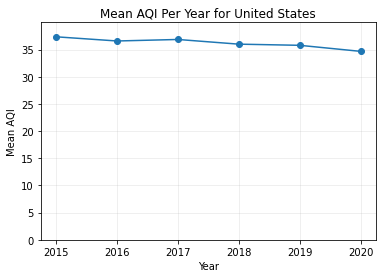

In [74]:
# Plotting the mean AQI per year as a line chart
years = mean_aqi_df.keys()
mean_aqi = mean_aqi_df.mean()

plt.plot(years, mean_aqi, label='Mean AQI', marker='o')
plt.ylim(0, 40)
y_ticks = np.arange(0,40,5)
plt.yticks(y_ticks)
plt.grid(alpha=.25)
plt.title("Mean AQI Per Year for United States")
plt.xlabel("Year")
plt.ylabel("Mean AQI")
plt.show()

In [109]:
# Getting the days with CO as main pollutant for each state
days_ozone_2015 = aqi_2015_df.groupby('State')['Days Ozone'].sum()
days_ozone_2016 = aqi_2016_df.groupby('State')['Days Ozone'].sum()
days_ozone_2017 = aqi_2017_df.groupby('State')['Days Ozone'].sum()
days_ozone_2018 = aqi_2018_df.groupby('State')['Days Ozone'].sum()
days_ozone_2019 = aqi_2019_df.groupby('State')['Days Ozone'].sum()
days_ozone_2020 = aqi_2020_df.groupby('State')['Days Ozone'].sum()

In [110]:
# Merge all 'Days ozone' data by year into a single DataFrame
days_ozone_df = pd.merge(days_ozone_2015, days_ozone_2016, how='left', on='State')
days_ozone_df = days_ozone_df.rename(columns={'Days Ozone_x': '2015', 'Days Ozone_y': '2016'})

In [111]:
days_ozone_df = pd.merge(days_ozone_df, days_ozone_2017, how='left', on='State')
days_ozone_df = days_ozone_df.rename(columns={'Days Ozone': '2017'})

In [112]:
days_ozone_df = pd.merge(days_ozone_df, days_ozone_2018, how='left', on='State')
days_ozone_df = days_ozone_df.rename(columns={'Days Ozone': '2018'})

In [113]:
days_ozone_df = pd.merge(days_ozone_df, days_ozone_2019, how='left', on='State')
days_ozone_df = days_ozone_df.rename(columns={'Days Ozone': '2019'})

In [114]:
days_ozone_df = pd.merge(days_ozone_df, days_ozone_2020, how='left', on='State')
days_ozone_df = days_ozone_df.rename(columns={'Days Ozone': '2020'})

In [140]:
days_ozone_df.head()

,2015,2016,2017,2018,2019,2020
State,,,,,,
Alabama,2476,2810,2762,2715,2779,1541
Alaska,631,740,689,697,480,316
Arizona,2521,2508,2506,2704,2926,2297
Arkansas,1735,1821,1543,1573,1585,1241
California,11594,11949,11331,10766,12947,7966


In [147]:
# Get the mean 'Days Ozone' pollution for each year within the United States
ozone_2015 = days_ozone_df['2015'].mean()
ozone_2015

3281.1296296296296

In [148]:
ozone_2016 = days_ozone_df['2016'].mean()
ozone_2016

3459.740740740741

In [149]:
ozone_2017 = days_ozone_df['2017'].mean()
ozone_2017

3479.8888888888887

In [150]:
ozone_2018 = days_ozone_df['2018'].mean()
ozone_2018

3486.296296296296

In [151]:
ozone_2019 = days_ozone_df['2019'].mean()
ozone_2019

3551.1666666666665

In [152]:
ozone_2020 = days_ozone_df['2020'].mean()
ozone_2020

2369.814814814815

In [154]:
# Create a dataframe of all the mean Ozone days
mean_ozone_df = pd.DataFrame({"2015": [ozone_2015],
                            "2016": ozone_2016, 
                            "2017": ozone_2017,
                            "2018": ozone_2018,
                            "2019": ozone_2019, 
                            "2020": ozone_2020
                           })
mean_ozone_df

,2015,2016,2017,2018,2019,2020
0,3281.12963,3459.740741,3479.888889,3486.296296,3551.166667,2369.814815


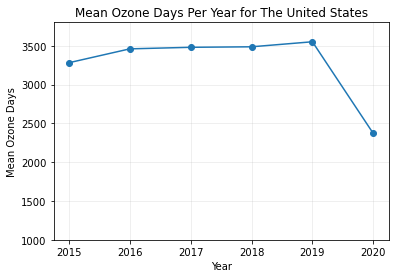

In [164]:
# Plotting the mean AQI per year as a line chart
mean_ozone = mean_ozone_df.mean()

plt.plot(years, mean_ozone, label='Mean AQI', marker='o')
plt.ylim(1000, mean_ozone.max()+250)
y_ticks = np.arange(1000,mean_ozone.max(),500)
plt.yticks(y_ticks)
plt.grid(alpha=.25)
plt.title("Mean Ozone Days Per Year for The United States")
plt.xlabel("Year")
plt.ylabel("Mean Ozone Days")
plt.show()

In [19]:
# Eric Code Ends